In [4]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [24]:
trainData = np.load("data/svm_train_data.npy", allow_pickle=True)
trainLabels = np.load("data/svm_train_labels.npy", allow_pickle=True)

In [28]:
def plot(marker1='ro', marker2='b^', show=True):
    for i, el in enumerate(trainData):
        if trainLabels[i]:
            plt.plot(el[0], el[1], marker1)
        else:
            plt.plot(el[0], el[1], marker2)
    if show:
        plt.show()

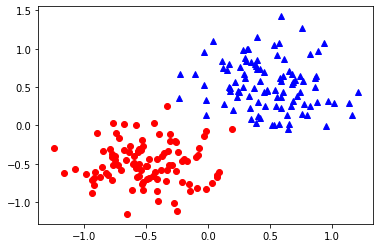

In [30]:
plot()

In [49]:
C = 10
svmTest = svm.SVC(C=C, kernel='linear')
svmTest.fit(trainData, trainLabels)

SVC(C=10, kernel='linear')

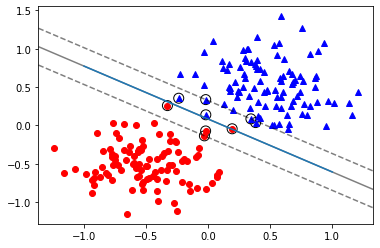

In [51]:


X = np.linspace(-1, 1, 1000)
Y = -(X * svmTest.coef_[0, 0] + svmTest.intercept_) / svmTest.coef_[0, 1]
        
plot(show=False)
        
# plotting
axes = plt.gca()

xx = np.linspace(*axes.get_xlim(), 30)
yy = np.linspace(*axes.get_ylim(), 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svmTest.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
axes.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
           
# plot support vectors
axes.scatter(svmTest.support_vectors_[:, 0], svmTest.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')


plt.plot(X,Y)
plt.show()